In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [31]:
#Defining the dataset

X = [i for i in range(-10000,10000)]
Y = [1 if i >= 0 else 0 for i in range(-10000, 10000)]


X_data, Y_data = np.array(X), np.array(Y)



In [32]:
#Test Train split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.05)


m = X_train.shape


In [33]:
print(X_train.shape)
print(X_test.shape)


(19000,)
(1000,)


In [34]:
print(X_test,Y_test)

[-5654  3232  1182 -4782  3007  3556  2548   622 -7479  8737  1165 -9730
  3314  4621  -943 -6796 -8204  6132 -2492 -4634 -6359  4084 -9833 -1554
  1757  5761  6702 -9964 -7380  1812 -3490  -667   796  5166  1044  5238
  6929 -2092  3205  8693 -2155  3817   655 -8763  9396  2302 -6325  1788
  9910  3474 -1778 -8255  9883  4278  9270 -4106   555 -3506  5126 -5425
  8595 -8994 -3934  1857  3418  7164  -980  5502 -1953  6674   875 -1777
 -9442  7276  7525 -7883  2874  5699 -4928 -2328  9163  5724 -3036  8807
  6386  6893 -4254  -663  8732  4661 -6349  6249  6536  6996 -1384  6159
 -9687 -1906 -3461 -7159 -6301  7795 -6198  2540  8077  1147  5625 -1005
  -315  5036 -7361 -3415 -4574 -5134  7811  1423 -7399  5291 -1281  9586
  8545  6481 -6450  9315  7569  2290  1731  2512 -8881  2442   -39   167
 -6299  -131  -755 -7744 -3972 -8227  9454 -4203  6916  8736  1444 -8500
  8473  8225  7076 -5870 -6090  7158 -6106 -5727  2494  2158 -9606  1591
 -4991 -9433 -3762  3132  6714  8124  3840 -9671  5

In [35]:
#Defining weights and bias 
# Y = WX  +  B
'''
W = np.random.rand(1, 1)
B = np.random.rand(1, 1)

print("W size :",W.shape)
print("B size :",B.shape)
print("X train size :",X_train.shape)
print("X test size :",X_test.shape)
print("W mat",W)
print("B mat",B)
'''

# Y is an array of size (M,1) , X = (M,N) here N = 1, hence W = (1,1), B = (M,1)

'\nW = np.random.rand(1, 1)\nB = np.random.rand(1, 1)\n\nprint("W size :",W.shape)\nprint("B size :",B.shape)\nprint("X train size :",X_train.shape)\nprint("X test size :",X_test.shape)\nprint("W mat",W)\nprint("B mat",B)\n'

In [36]:
#Defining the learning rate

learning_rate = 0.0001

In [37]:
# Implementing the linear regression Fully 
#Defining weights and bias 
# Y = WX  +  B
import random 

W = 0
B = 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#W = 9992.95668876
#B = -16632126.19550556

print("Initial W and B : ", W, B)

#Defining the learning rate

learning_rate = 0.0001

#Defining the number of epochs
epochs = 10000
W_list = []
B_list = []
error_tracker = []

m = X_train.shape[0]

for e in range(epochs):
    dj_dw = 0
    dj_db = 0
    error = 0
    #Implementing the forward Pass  Y_dash  =  W * X + B
    for (i,x) in enumerate(X_train):
     #   print(i,x,Y_train[i])
        y = W * x + B
        y = sigmoid(y)

        loss = - (Y_train[i] * y + (1 - Y_train[i]) * (1 - y))  # BCE Loss for a single sample
        error += loss  # Accumulate loss

        
        
        dj_dw = dj_dw +  (y - Y_train[i]) *x
        dj_db = dj_db +  (y - Y_train[i])
    #Gradient descentant
    error_tracker.append(error/m)
    W = W - learning_rate * (1/m) * dj_dw
    B = B - learning_rate * (1/m) * dj_db
    W_list.append(W)
    B_list.append(B)
        
#Testing the model with test data

predicted_Y = []
decision_boundary = []
for (i,x) in enumerate(X_train):
    y = W * x + B
    decision_boundary.append(y)
    y = sigmoid(y)
    predicted_Y.append(y)    

Initial W and B :  0 0


/var/folders/rg/_3xyjrpd4z11365q180j5vc80000gp/T/ipykernel_31102/1029889301.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


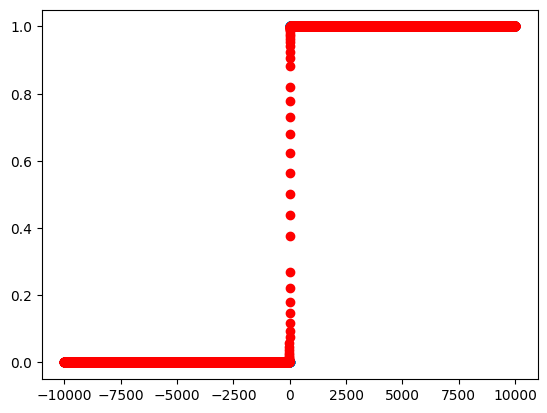

In [38]:
plt.scatter(X_train, Y_train, label='Actual Value')
#plt.scatter(X_train, decision_boundary, label = 'decision_boundary', color = 'yellow')
plt.scatter(X_train, predicted_Y, label='Predicted Value', color='red')

In [29]:
y = W * 0.21 + B
print(y)
print(sigmoid(y))

0.06435108280484143
0.5160822212947731


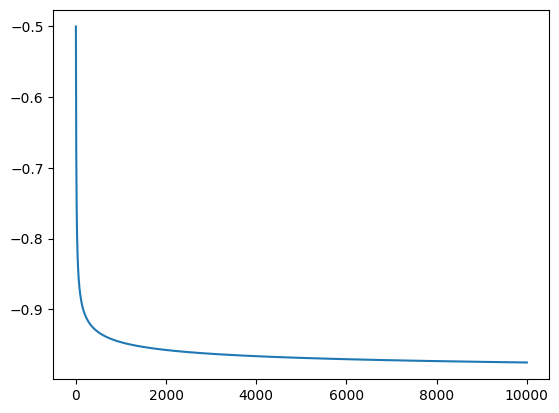

In [30]:
plt.plot(range(epochs),error_tracker)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lin_reg=LogisticRegression()
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
lin_reg.fit(X_train,Y_train)

/opt/miniconda3/envs/gpu-test/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
lin_reg.predict(np.ones(3).reshape(-1,1))

array([1, 1, 1])

In [15]:
y_predict = lin_reg.predict(X_test.reshape(-1,1))
y_train_predict = lin_reg.predict(X_train)
print(lin_reg.coef_,lin_reg.intercept_)

[[1.11773114]] [0.78121638]


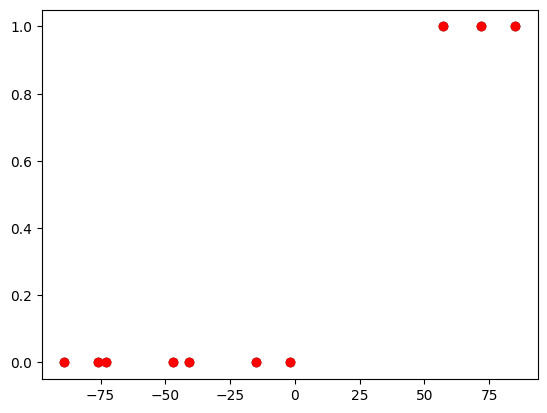

In [16]:
plt.scatter(X_test,Y_test,color = 'black')
plt.scatter(X_test,y_predict,color='red')
plt.show()

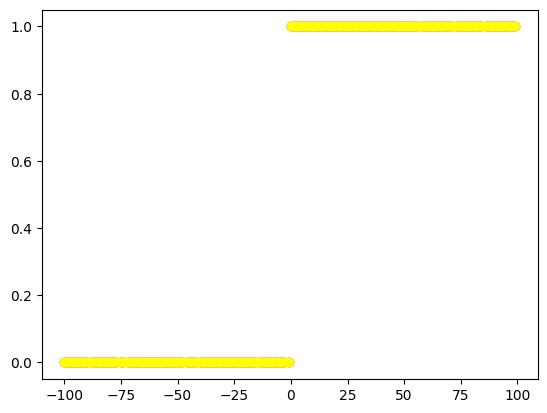

In [17]:
plt.scatter(X_train,Y_train,color = 'red')
plt.scatter(X_train,y_train_predict,color = 'yellow')
plt.show()

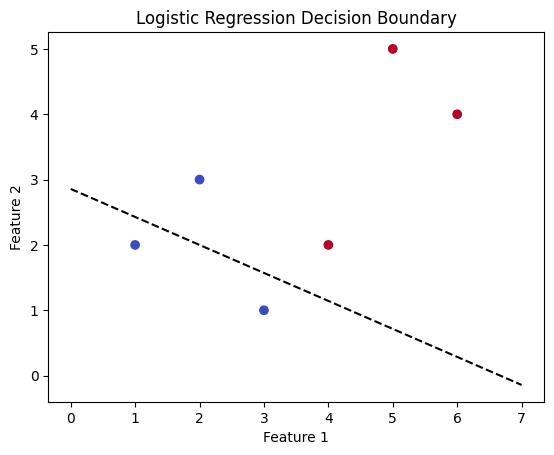

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate some data
X = np.array([[1, 2], [2, 3], [3, 1], [4, 2], [5, 5], [6, 4]])
y = np.array([0, 0, 0, 1, 1, 1])

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Train parameters (for simplicity, just a linear model)
w = np.array([0.3, 0.7])  # Example weights
b = -2  # Example bias

# Decision boundary: w * x + b = 0
# x2 = -(w1 * x1 + b) / w2
x1 = np.linspace(0, 7, 100)
x2 = -(w[0] * x1 + b) / w[1]

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Plot the decision boundary
plt.plot(x1, x2, 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()